In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import InputLayer
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
%matplotlib inline
seed = 42
np.random.seed(seed)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

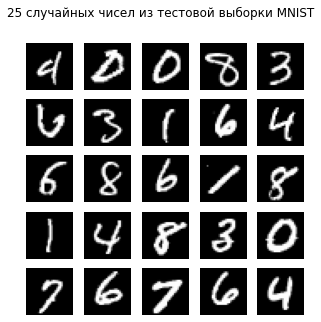

In [3]:
indexes = np.random.randint(0, x_train.shape[0], size = 25)
images = x_train[indexes]
labels = y_train[indexes]
fig_mnist = plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
fig_mnist.suptitle("25 случайных чисел из тестовой выборки MNIST")
plt.show()

In [4]:
x_train_normalized = np.reshape(x_train, [-1, 1, 28, 28]).astype("float32")/255
x_test_normalized = np.reshape(x_test, [-1, 1, 28, 28]).astype("float32")/255
y_train_binary = to_categorical(y_train)
y_test_binary = to_categorical(y_test)

In [5]:
def mnist_model(optimizer = 'adam'):
    model = Sequential()
    model.add(InputLayer(input_shape = (1, 28, 28)))
    model.add(Conv2D(32, (2, 2), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(padding = 'same'))
    model.add(Conv2D(64, (2, 2), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(padding = 'same'))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, input_dim = 300, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model

In [6]:
'''
epoches = [5, 10, 20, 50]
batches = [64, 128, 256]
optimrs = ['rmsprop', 'adam']
hps = dict(optimizer = optimrs, epochs = epoches, batch_size = batches)
mnist_estimator = KerasClassifier(model = mnist_model, verbose = 1)
mnist_grid = GridSearchCV(estimator = mnist_estimator, param_grid = hps, verbose = 1)
mnist_grid_result = mnist_grid.fit(x_train_normalized, y_train_binary, verbose = 0)
print("Лучшие параметры:", mnist_grid_result.best_params_)
print("Лучшая точность:", mnist_grid_result.best_score_)
mnist_optimal_model = mnist_model(optimizer = mnist_grid_result['optimizer'])
mnist_optimal_history = mnist_optimal_model.fit(x_train_normalized, y_train_binary, epochs = mnist_grid_result['epochs'], batch_size = mnist_grid_result['batch_size'], verbose = 0, validation_data = (x_test_normalized, y_test_binary))
'''

'\nepoches = [5, 10, 20, 50]\nbatches = [64, 128, 256]\noptimrs = [\'rmsprop\', \'adam\']\nhps = dict(optimizer = optimrs, epochs = epoches, batch_size = batches)\nmnist_estimator = KerasClassifier(model = mnist_model, verbose = 1)\nmnist_grid = GridSearchCV(estimator = mnist_estimator, param_grid = hps, verbose = 1)\nmnist_grid_result = mnist_grid.fit(x_train_normalized, y_train_binary, verbose = 0)\nprint("Лучшие параметры:", mnist_grid_result.best_params_)\nprint("Лучшая точность:", mnist_grid_result.best_score_)\nmnist_optimal_model = mnist_model(optimizer = mnist_grid_result[\'optimizer\'])\nmnist_optimal_history = mnist_optimal_model.fit(x_train_normalized, y_train_binary, epochs = mnist_grid_result[\'epochs\'], batch_size = mnist_grid_result[\'batch_size\'], verbose = 0, validation_data = (x_test_normalized, y_test_binary))\n'

In [7]:
'''
Лучшие параметры: {'batch_size': 256, 'epochs': 50, 'optimizer': 'rmsprop'}
Лучшая точность: 0.9864333333333335
'''
mnist_optimal_model = mnist_model(optimizer = 'rmsprop')
mnist_optimal_history = mnist_optimal_model.fit(x_train_normalized, y_train_binary, epochs = 50, batch_size = 256, verbose = 0, validation_data = (x_test_normalized, y_test_binary))

In [8]:
print(mnist_optimal_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


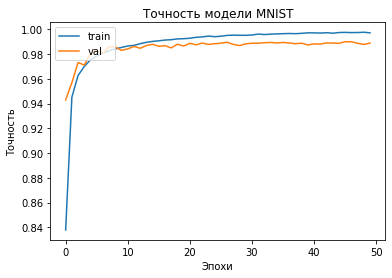

In [9]:
plt.plot(mnist_optimal_history.history['accuracy'])
plt.plot(mnist_optimal_history.history['val_accuracy'])
plt.title("Точность модели MNIST")
plt.xlabel("Эпохи")
plt.ylabel("Точность")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

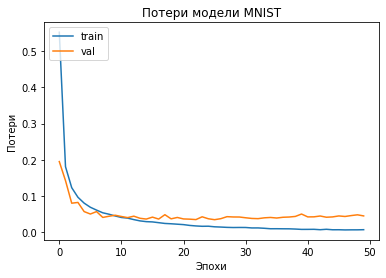

In [10]:
plt.plot(mnist_optimal_history.history['loss'])
plt.plot(mnist_optimal_history.history['val_loss'])
plt.title("Потери модели MNIST")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

In [11]:
y_pred = mnist_optimal_model.predict(x_test_normalized)

313/313 [==============================] - 0s 1ms/step


In [12]:
y_pred_dec = np.argmax(y_pred, axis = 1)
y_test_dec = np.argmax(y_test_binary, axis = 1)
print(classification_report(y_test_dec, y_pred_dec))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [13]:
mnist_confusion_matrix = confusion_matrix(y_test_dec, y_pred_dec, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(mnist_confusion_matrix)

[[ 974    0    1    2    0    0    2    0    1    0]
 [   1 1129    2    1    0    0    0    0    1    1]
 [   1    1 1023    1    0    0    0    5    1    0]
 [   0    0    1  998    0    4    0    3    2    2]
 [   1    0    2    0  972    0    1    0    0    6]
 [   1    0    0    5    0  883    2    0    1    0]
 [   4    2    0    1    2    1  946    0    2    0]
 [   0    3    6    0    0    0    0 1017    1    1]
 [   4    1    4    3    0    2    0    3  955    2]
 [   2    0    1    2    3    2    0    4    2  993]]


In [14]:
graph_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
graph_true = []
graph_false = []
for i in range(10):
    s = 0
    for j in range(10):
        if i != j:
            s += mnist_confusion_matrix[i, j]
        else:
            graph_true.append(mnist_confusion_matrix[i, j])
    graph_false.append(s)
print(graph_true)
print(graph_false)

[974, 1129, 1023, 998, 972, 883, 946, 1017, 955, 993]
[6, 6, 9, 12, 10, 9, 12, 11, 19, 16]


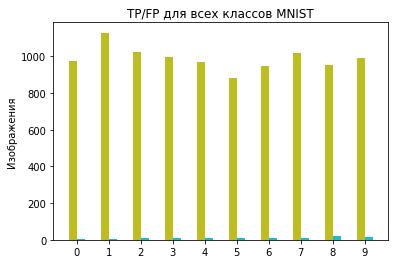

In [15]:
fig, ax = plt.subplots()
graph_x = np.arange(len(graph_labels))
bar_width = 0.25
for i in range(10):
    b_true = ax.bar(graph_x-bar_width*0.5, graph_true, bar_width)
    b_false = ax.bar(graph_x+bar_width*0.5, graph_false, bar_width)
ax.set_ylabel("Изображения")
ax.set_title("TP/FP для всех классов MNIST")
ax.set_xticks(graph_x)
ax.set_xticklabels(graph_labels)
plt.show()

In [16]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

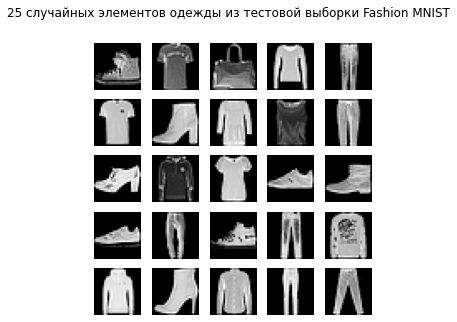

In [17]:
indexes = np.random.randint(0, x_train.shape[0], size = 25)
images = x_train[indexes]
labels = y_train[indexes]
fig_mnist = plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
fig_mnist.suptitle("25 случайных элементов одежды из тестовой выборки Fashion MNIST")
plt.show()

In [18]:
x_train_normalized = np.reshape(x_train, [-1, 1, 28, 28]).astype("float32")/255
x_test_normalized = np.reshape(x_test, [-1, 1, 28, 28]).astype("float32")/255
y_train_binary = to_categorical(y_train)
y_test_binary = to_categorical(y_test)

In [19]:
def mnist_fashion_model(optimizer = 'adam'):
    model = Sequential()
    model.add(InputLayer(input_shape = (1, 28, 28)))
    model.add(Conv2D(32, (2, 2), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(padding = 'same'))
    model.add(Conv2D(64, (2, 2), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(padding = 'same'))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, input_dim = 300, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model

In [20]:
'''
epoches = [5, 10, 20, 50]
batches = [64, 128, 256]
optimrs = ['rmsprop', 'adam']
hps = dict(optimizer = optimrs, epochs = epoches, batch_size = batches)
mnist_fashion_estimator = KerasClassifier(model = mnist_fashion_model, verbose = 1)
mnist_fashion_grid = GridSearchCV(estimator = mnist_fashion_estimator, param_grid = hps, verbose = 1)
mnist_fashion_grid_result = mnist_fashion_grid.fit(x_train_normalized, y_train_binary, verbose = 0)
print("Лучшие параметры:", mnist_fashion_grid_result.best_params_)
print("Лучшая точность:", mnist_fashion_grid_result.best_score_)
mnist_fashion_optimal_model = mnist_fashion_model(optimizer = mnist_fashion_grid_result['optimizer'])
mnist_fashion_optimal_history = mnist_fashion_optimal_model.fit(x_train_normalized, y_train_binary, epochs = mnist_fashion_grid_result['epochs'], batch_size = mnist_fashion_grid_result['batch_size'], verbose = 0, validation_data = (x_test_normalized, y_test_binary))
'''

'\nepoches = [5, 10, 20, 50]\nbatches = [64, 128, 256]\noptimrs = [\'rmsprop\', \'adam\']\nhps = dict(optimizer = optimrs, epochs = epoches, batch_size = batches)\nmnist_fashion_estimator = KerasClassifier(model = mnist_fashion_model, verbose = 1)\nmnist_fashion_grid = GridSearchCV(estimator = mnist_fashion_estimator, param_grid = hps, verbose = 1)\nmnist_fashion_grid_result = mnist_fashion_grid.fit(x_train_normalized, y_train_binary, verbose = 0)\nprint("Лучшие параметры:", mnist_fashion_grid_result.best_params_)\nprint("Лучшая точность:", mnist_fashion_grid_result.best_score_)\nmnist_fashion_optimal_model = mnist_fashion_model(optimizer = mnist_fashion_grid_result[\'optimizer\'])\nmnist_fashion_optimal_history = mnist_fashion_optimal_model.fit(x_train_normalized, y_train_binary, epochs = mnist_fashion_grid_result[\'epochs\'], batch_size = mnist_fashion_grid_result[\'batch_size\'], verbose = 0, validation_data = (x_test_normalized, y_test_binary))\n'

In [21]:
mnist_fashion_optimal_model = mnist_fashion_model(optimizer = 'rmsprop')
mnist_fashion_optimal_history = mnist_fashion_optimal_model.fit(x_train_normalized, y_train_binary, epochs = 50, batch_size = 256, verbose = 0, validation_data = (x_test_normalized, y_test_binary))

In [22]:
print(mnist_fashion_optimal_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


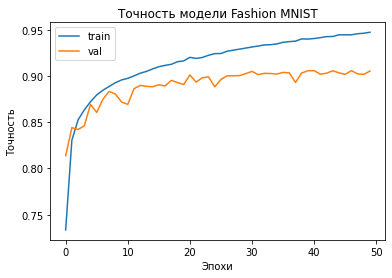

In [23]:
plt.plot(mnist_fashion_optimal_history.history['accuracy'])
plt.plot(mnist_fashion_optimal_history.history['val_accuracy'])
plt.title("Точность модели Fashion MNIST")
plt.xlabel("Эпохи")
plt.ylabel("Точность")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

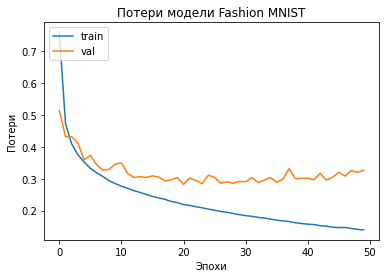

In [24]:
plt.plot(mnist_fashion_optimal_history.history['loss'])
plt.plot(mnist_fashion_optimal_history.history['val_loss'])
plt.title("Потери модели Fashion MNIST")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

In [25]:
y_pred = mnist_fashion_optimal_model.predict(x_test_normalized)

313/313 [==============================] - 0s 1ms/step


In [26]:
y_pred_dec = np.argmax(y_pred, axis = 1)
y_test_dec = np.argmax(y_test_binary, axis = 1)
print(classification_report(y_test_dec, y_pred_dec))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.80      0.90      0.84      1000
           3       0.93      0.88      0.91      1000
           4       0.84      0.87      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.77      0.71      0.74      1000
           7       0.93      0.98      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [27]:
mnist_fashion_confusion_matrix = confusion_matrix(y_test_dec, y_pred_dec, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(mnist_fashion_confusion_matrix)

[[839   1  23  12   7   1 106   0  11   0]
 [  5 982   3   7   2   0   0   0   1   0]
 [  9   2 895   5  46   0  38   0   5   0]
 [ 16  11  17 881  39   0  27   0   9   0]
 [  0   0  77  17 870   0  34   0   2   0]
 [  0   0   0   1   0 967   0  23   1   8]
 [ 93   1 101  17  71   0 710   0   7   0]
 [  0   0   0   0   0   9   0 980   0  11]
 [  2   1   3   3   3   0   5   3 980   0]
 [  0   0   0   0   0   4   1  44   0 951]]


In [28]:
graph_labels = ["Футболка", "Шорты", "Свитер", "Платье", "Плащ", "Сандали", "Рубашка", "Кроссовки", "Сумка", "Ботинки"]
graph_true = []
graph_false = []
for i in range(10):
    s = 0
    for j in range(10):
        if i != j:
            s += mnist_fashion_confusion_matrix[i, j]
        else:
            graph_true.append(mnist_fashion_confusion_matrix[i, j])
    graph_false.append(s)
print(graph_true)
print(graph_false)

[839, 982, 895, 881, 870, 967, 710, 980, 980, 951]
[161, 18, 105, 119, 130, 33, 290, 20, 20, 49]


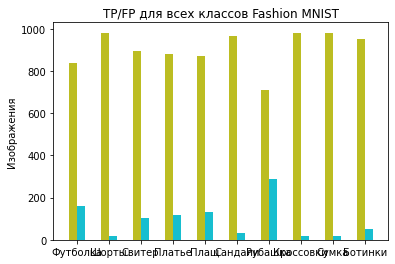

In [29]:
fig, ax = plt.subplots()
graph_x = np.arange(len(graph_labels))
bar_width = 0.25
for i in range(10):
    b_true = ax.bar(graph_x-bar_width*0.5, graph_true, bar_width)
    b_false = ax.bar(graph_x+bar_width*0.5, graph_false, bar_width)
ax.set_ylabel("Изображения")
ax.set_title("TP/FP для всех классов Fashion MNIST")
ax.set_xticks(graph_x)
ax.set_xticklabels(graph_labels)
plt.show()